In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import *

In [3]:
plotting_path = "/data/user/tvaneede/GlobalFit/analysis/study_inputs/output/flux_models"

In [5]:
def powerlaw( energy, norm, gamma ):

    return norm*(energy/1e5)**(2-gamma)

def powerlaw_cutoff( energy, norm, gamma, cutoff ):

    return norm*(energy/1e5)**(2-gamma)*np.exp(-energy/cutoff)

def broken_powerlaw( energy, norm, e_break, gamma_1, gamma_2 ):

    result = np.zeros_like(energy)  # Initialize an array of the same shape as energy

    if 1e5 < e_break:
        norm_broken = norm * (1e5/e_break) ** (gamma_1)
    else:
        norm_broken = norm * (1e5/e_break) ** (gamma_2)

    # Apply conditions
    mask = energy <= e_break
    result[mask]  = norm_broken * (energy[mask]/1e5)**2 * (energy[mask] / e_break) ** (- gamma_1)
    result[~mask] = norm_broken * (energy[~mask]/1e5)**2 * (energy[~mask] / e_break) ** ( - gamma_2)

    return result

def logparabola( energy, norm, alpha, beta ):
        
    return norm*(energy/1e5)**(2-alpha-beta*np.log(energy/1e5))


def bump( energy, bump_energy, bump_norm, alpha ):

    # from paper
    exponent = (-alpha*(np.log(energy/bump_energy))**2)
    return (bump_energy)**2 * bump_norm * np.exp( exponent )


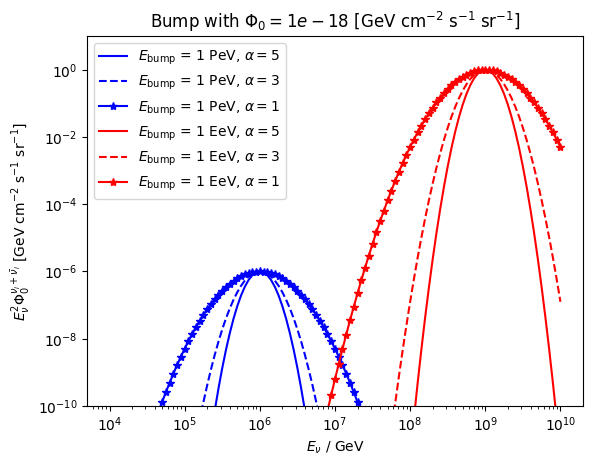

In [6]:
# study bump
log_energies_bump = np.linspace(4,10,121)
energies_bump = 10**log_energies_bump

bump_norm = 1e-18

# plotting
fig, (ax) = plt.subplots(1, 1)

ax.plot( energies_bump, bump( energy = energies_bump, bump_energy = 1e6, bump_norm = bump_norm, alpha = 5), 
         "-", label = r"$E_{\rm bump}$ = 1 PeV, $\alpha = 5$", color = "blue" )
ax.plot( energies_bump, bump( energy = energies_bump, bump_energy = 1e6, bump_norm = bump_norm, alpha = 3), 
         "--", label = r"$E_{\rm bump}$ = 1 PeV, $\alpha = 3$", color = "blue" )
ax.plot( energies_bump, bump( energy = energies_bump, bump_energy = 1e6, bump_norm = bump_norm, alpha = 1), 
         "-*", label = r"$E_{\rm bump}$ = 1 PeV, $\alpha = 1$", color = "blue" )

ax.plot( energies_bump, bump( energy = energies_bump, bump_energy = 1e9, bump_norm = bump_norm, alpha = 5), 
         "-", label = r"$E_{\rm bump}$ = 1 EeV, $\alpha = 5$", color = "red" )
ax.plot( energies_bump, bump( energy = energies_bump, bump_energy = 1e9, bump_norm = bump_norm, alpha = 3), 
         "--", label = r"$E_{\rm bump}$ = 1 EeV, $\alpha = 3$", color = "red" )
ax.plot( energies_bump, bump( energy = energies_bump, bump_energy = 1e9, bump_norm = bump_norm, alpha = 1), 
         "-*", label = r"$E_{\rm bump}$ = 1 EeV, $\alpha = 1$", color = "red" )


ax.set_xlabel(r"$E_{\nu}$ / GeV")
ax.set_ylabel(r"$E_{\nu}^2 \Phi_0^{\nu_i + \bar{\nu}_i}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]")

ax.set_title(r"Bump with $\Phi_0 = 1e-18$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]")

ax.set_yscale("log")
ax.set_xscale("log")

ax.set_ylim( [ 1e-10,1e1 ])

ax.legend(ncol=1)

plt.savefig(f"{plotting_path}/compare_bump.pdf")

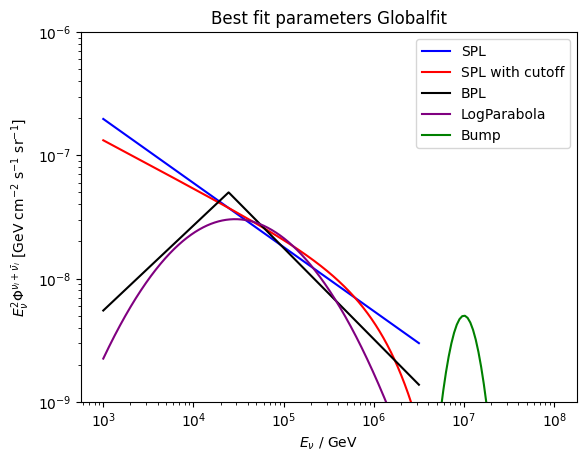

In [28]:
log_energies = np.linspace(3,6.5,1001)
energies = 10**log_energies

norm_factor = 1e-8

flux_powerlaw = powerlaw( energies, norm = 1.8*norm_factor, gamma = 2.52)
flux_powerlaw_cutoff = powerlaw_cutoff( energies, norm = 2.2*norm_factor, gamma = 2.39, cutoff = 10**6.15)
flux_broken_powerlaw = broken_powerlaw( energies, norm = 1.77*norm_factor, e_break = 10**4.39, gamma_1 = 1.31, gamma_2 = 2.74)
flux_logparabola = logparabola( energies, norm = 2.13*norm_factor, alpha = 2.57, beta = 0.23)

log_energies_bump = np.linspace(5,8,101)
energies_bump = 10**log_energies_bump

flux_bump = bump( energies_bump, 1e7, 0.5e-22, 5)

# plotting
fig, (ax) = plt.subplots(1, 1)

ax.plot( energies, flux_powerlaw, label = "SPL", color = "blue" )
ax.plot( energies, flux_powerlaw_cutoff, label = "SPL with cutoff", color = "red" )
ax.plot( energies, flux_broken_powerlaw, label = "BPL", color = "black" )
ax.plot( energies, flux_logparabola, label = "LogParabola", color = "purple" )

ax.plot( energies_bump, flux_bump, label = "Bump", color = "green" )

ax.set_xlabel(r"$E_{\nu}$ / GeV")
ax.set_ylabel(r"$E_{\nu}^2 \Phi^{\nu_i + \bar{\nu}_i}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]")

ax.set_title("Best fit parameters Globalfit")

ax.set_yscale("log")
ax.set_xscale("log")

ax.set_ylim( [ 1e-1,1e3 ])
ax.set_ylim( [ 1e-9,1e-6 ])

ax.legend(ncol = 1)

plt.savefig(f"{plotting_path}/compare_astrophysical_models_globalfit.pdf")


In [150]:
flux_broken_powerlaw

array([5.49886764e+09, 5.52953061e+09, 5.56036456e+09, ...,
       1.39044324e+09, 1.38217574e+09, 1.37395740e+09])